<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-11-22 04:43:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-11-22 04:43:45 (13.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [5]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /Users/Saeed/anaconda/envs/python3.6

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2o             |       h26aff7b_0         3.4 MB  anaconda
    ca-certificates-2018.03.07 |                0         124 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

    ca-certificates: 2018.03.07-0      --> 2018.03.07-0      anaconda
    openssl:         1.0.2o-h26aff7b_0 --> 1.0.2o-h26aff7b_0 anaconda


openssl-1.0.2o       |  3.4 MB | ####################################### | 100% 
ca-certificates-2018 |  124 KB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

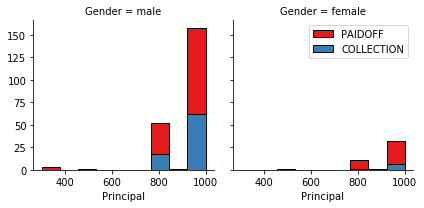

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

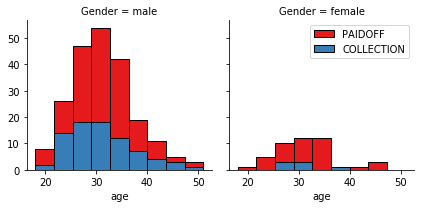

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

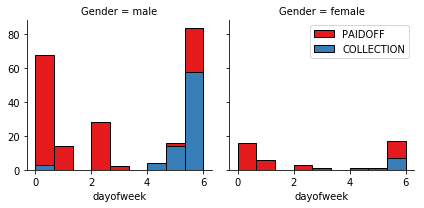

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [303]:
#--ABOUT
"""
Loan_status	Whether a loan is paid off on in collection
Principal	Basic principal loan amount at the
Terms	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
Effective_date	When the loan got originated and took effects
Due_date	Since it’s one-time payoff schedule, each loan has one single due date
Age	Age of applicant
Education	Education of applicant
Gender	The gender of applicant

************************************* WE ARE LOOKING FOR LOAN_STATUS TARGET FIELD *************************************
"""

'\nLoan_status\tWhether a loan is paid off on in collection\nPrincipal\tBasic principal loan amount at the\nTerms\tOrigination terms which can be weekly (7 days), biweekly, and monthly payoff schedule\nEffective_date\tWhen the loan got originated and took effects\nDue_date\tSince it’s one-time payoff schedule, each loan has one single due date\nAge\tAge of applicant\nEducation\tEducation of applicant\nGender\tThe gender of applicant\n\n************************************* WE ARE LOOKING FOR LOAN_STATUS TARGET FIELD *************************************\n'

In [722]:
#--IMPORTING LIBRARIES
#-- Generalized libraries
import itertools
import numpy as np
import pandas as pd
#-- Plotting libraries
import matplotlib.pyplot as plt

#-- Sklearn libraries
#-- Algorithms
from sklearn.neighbors import KNeighborsClassifier

#--Preprocessing and splitting methods
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#-- Evaluation metrics
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

%matplotlib inline


In [723]:
#--GETTING DATA
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-24 23:12:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-11-24 23:12:57 (12.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [725]:
#--LOADING DATA FROM CSV
loans = pd.read_csv('loan_train.csv')
#loans = pd.read_csv('loan_test.csv')
loans.head() #Visualize the first nrows

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [726]:
#PRE-PROCESSING AND SELECTION VERIFY
loans.dtypes
#--Must to convert Gender,loan_status,education into numerical value
#--Must to convert effective_date and due_date into properly date objects

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e840d0ef0>]],
      dtype=object)

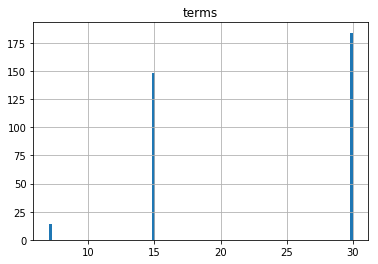

In [727]:
#SHOW HISTOGRAM
loans.hist(column='terms', bins=100)

In [728]:
#--CONVERTING DATES COLUMNS TO DATE TIME OBJECTS
for x in ['effective_date','due_date']:
    loans[x] = pd.to_datetime(loans[x])

In [729]:
#--SHOWING INFO ABOUT LOANS
loans.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [730]:
#--MORE ABOUT LOANS
loans.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [731]:
#DETERMINING THE DEPENDENTS AND INDEPENDENT VARIABLES
X = loans[['Principal','terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']].values
y = loans['loan_status']
print(np.unique(y))

['COLLECTION' 'PAIDOFF']


In [732]:
#--COLUMNS TO NUMERICAL VALUES CONVERTIONS

#--Efective date field convertion
codif_eff = preprocessing.LabelEncoder()
codif_eff.fit(X[:,2])
#codif_eff.classes_
X[:,2] = codif_eff.transform(X[:,2])

#--Due date field convertion
codif_due = preprocessing.LabelEncoder()
codif_due.fit(X[:,3])
#codif_due.classes_
X[:,3] = codif_due.transform(X[:,3])

#--Education field convertion
codif_edu = preprocessing.LabelEncoder()
codif_edu.fit(X[:,5])
#codif_edu.classes_
X[:,5] = codif_edu.transform(X[:,5])

#--Gender field convertion
codif_gen = preprocessing.LabelEncoder()
codif_gen.fit(X[:,6])
#codif_gen.classes_
X[:,6] = codif_gen.transform(X[:,6])

#--Loan_Status convertion
codif_loanStatus = preprocessing.LabelEncoder()
codif_loanStatus.fit(y)
#codif_loanStatus.classes_
y = codif_loanStatus.transform(y)

In [733]:
#NORMALIZE DATA BEFORE TRAINING AND TESTING
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.52,  0.92, -3.02, -0.1 ,  2.33, -0.65,  0.42],
       [ 0.52,  0.92, -3.02, -0.1 ,  0.34, -1.52, -2.38],
       [ 0.52, -0.96, -3.02, -1.71, -0.65,  1.1 ,  0.42],
       [ 0.52,  0.92, -2.15,  0.13, -0.49,  1.1 , -2.38],
       [ 0.52,  0.92, -2.15,  0.13, -0.32,  1.1 ,  0.42],
       [ 0.52,  0.92, -2.15,  0.13,  0.84,  1.1 ,  0.42],
       [ 0.52,  0.92, -2.15,  0.13, -0.49,  1.1 ,  0.42],
       [-1.31, -0.96, -1.28, -1.25, -0.82,  1.1 ,  0.42],
       [-5.89, -1.96, -1.28, -2.64, -0.32,  1.1 ,  0.42],
       [ 0.52, -0.96, -1.28,  0.36,  1.34, -0.65,  0.42]])

In [734]:
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [735]:
#TIME TO MAKE THE TRAIN AND TEST SPLIT
"""
ABOUT TRAIN-TEST SPLIT

test_size : float, int or None, optional (default=None)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. 
If train_size is also None, it will be set to 0.25.

random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the 
random number generator; If None, the random number generator is the RandomState instance used by np.random.
"""
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)
print ('TRAIN SET SHAPE:', X_train.shape,  y_train.shape)
print ('TEST SET SHAPE:', X_test.shape,  y_test.shape)

TRAIN SET SHAPE: (242, 7) (242,)
TEST SET SHAPE: (104, 7) (104,)


In [736]:
#KNN IMPLEMENTED
#Looking for best K
K_max = 35
"""
numpy.zeros(shape, dtype=float, order='C')
Return a new array of given shape and type, filled with zeros.
"""
meanAccuracy = np.zeros((K_max-1))
standardDeviation = np.zeros((K_max-1))
yHats = [[] for k in range(0,K_max-1,1)]

for k in range(1,K_max,1):
    neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neighbor.predict(X_test)
    meanAccuracy[k-1] = metrics.accuracy_score(y_test, yhat)
    standardDeviation[k-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    yHats[k-1] = yhat
    
print ("Mean Accuracy's >",meanAccuracy)
print ("Standard Deviation Accuracy's >",standardDeviation)
#print (yHats)

Mean Accuracy's > [0.62 0.61 0.59 0.61 0.63 0.65 0.69 0.66 0.7  0.7  0.75 0.74 0.74 0.74
 0.73 0.73 0.72 0.72 0.74 0.73 0.74 0.73 0.74 0.74 0.74 0.73 0.74 0.74
 0.74 0.74 0.74 0.73 0.73 0.73]
Standard Deviation Accuracy's > [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04]


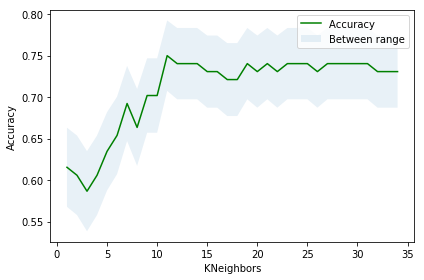

In [737]:
#PLOTTING
plt.plot(range(1,K_max),meanAccuracy,'g')
plt.fill_between(range(1,K_max),meanAccuracy - 1 * standardDeviation,meanAccuracy + 1 * standardDeviation, alpha=0.1)
plt.legend(('Accuracy ', 'Between range'))
plt.ylabel('Accuracy')
plt.xlabel('KNeighbors')
plt.tight_layout()
plt.show()

In [738]:
#--METRICS REPORT
"""
sklearn.metrics.log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
sklearn.metrics.f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
sklearn.metrics.jaccard_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
"""
accIndex = meanAccuracy.argmax()+1
print( "The better K is", meanAccuracy.max(), "where k=", accIndex)
print("JACCARD: %.4f" % jaccard_similarity_score(y_test, yHats[accIndex]))
print("F1_SCORE: %.4f" % f1_score(y_test, yHats[accIndex],average ='micro'))

The better K is 0.75 where k= 11
JACCARD: 0.7404
F1_SCORE: 0.7404


# Decision Tree

In [488]:
#--ABOUT
"""
Loan_status	Whether a loan is paid off on in collection
Principal	Basic principal loan amount at the
Terms	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
Effective_date	When the loan got originated and took effects
Due_date	Since it’s one-time payoff schedule, each loan has one single due date
Age	Age of applicant
Education	Education of applicant
Gender	The gender of applicant

************************************* WE ARE LOOKING FOR LOAN_STATUS TARGET FIELD *************************************
"""

'\nLoan_status\tWhether a loan is paid off on in collection\nPrincipal\tBasic principal loan amount at the\nTerms\tOrigination terms which can be weekly (7 days), biweekly, and monthly payoff schedule\nEffective_date\tWhen the loan got originated and took effects\nDue_date\tSince it’s one-time payoff schedule, each loan has one single due date\nAge\tAge of applicant\nEducation\tEducation of applicant\nGender\tThe gender of applicant\n\n************************************* WE ARE LOOKING FOR LOAN_STATUS TARGET FIELD *************************************\n'

In [590]:
#--requireds installations
#!conda update -n base -c defaults conda
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [739]:
#--IMPORTING LIBRARIES
#-- Generalized libraries
import itertools
import numpy as np
import pandas as pd
#-- Plotting and image libraries
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg

#-- Sklearn libraries
#-- Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#--Preprocessing and splitting methods
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO

#-- Evaluation metrics
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

%matplotlib inline


In [740]:
#--GETTING DATA
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-24 23:13:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2019-11-24 23:13:56 (17.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [741]:
#--LOADING DATA FROM CSV
loans = pd.read_csv('loan_train.csv')
#loans = pd.read_csv('loan_test.csv')
loans.head(10) #Visualize the first nrows

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [742]:
#PRE-PROCESSING AND SELECTION VERIFY
loans.dtypes
#--Must to convert Gender,loan_status,education into numerical value
#--Must to convert effective_date and due_date into properly date objects

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e7ff3f320>]],
      dtype=object)

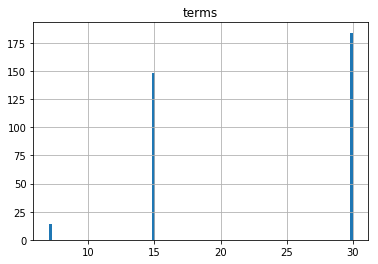

In [743]:
#--SHOW HISTOGRAM
loans.hist(column='terms', bins=100)

In [744]:
#--CONVERTING DATES COLUMNS TO DATE TIME OBJECTS
for x in ['effective_date','due_date']:
    loans[x] = pd.to_datetime(loans[x])

In [745]:
#--DETERMINING THE DEPENDENTS AND INDEPENDENT VARIABLES
X = loans[['Principal','terms', 'age', 'education', 'Gender']].values
y = loans['loan_status']
print(np.unique(y))

['COLLECTION' 'PAIDOFF']


In [746]:
#--COLUMNS TO NUMERICAL VALUES CONVERTIONS

#--Education field convertion
codif_edu = preprocessing.LabelEncoder()
codif_edu.fit(X[:,3])
#codif_edu.classes_
X[:,3] = codif_edu.transform(X[:,3])

#--Gender field convertion
codif_gen = preprocessing.LabelEncoder()
codif_gen.fit(X[:,4])
#codif_gen.classes_
X[:,4] = codif_gen.transform(X[:,4])

#--Loan_Status convertion
#codif_loanStatus = preprocessing.LabelEncoder()
#codif_loanStatus.fit(y)
#codif_loanStatus.classes_
#y = codif_loanStatus.transform(y)

In [747]:
X[0:10]

array([[1000, 30, 45, 1, 1],
       [1000, 30, 33, 0, 0],
       [1000, 15, 27, 3, 1],
       [1000, 30, 28, 3, 0],
       [1000, 30, 29, 3, 1],
       [1000, 30, 36, 3, 1],
       [1000, 30, 28, 3, 1],
       [800, 15, 26, 3, 1],
       [300, 7, 29, 3, 1],
       [1000, 15, 39, 1, 1]], dtype=object)

In [761]:
y[0:10]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
5    PAIDOFF
6    PAIDOFF
7    PAIDOFF
8    PAIDOFF
9    PAIDOFF
Name: loan_status, dtype: object

In [762]:
#--LET'S MAKE THE TRAINER
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=3)
print ('TRAIN SET SHAPE:', X_train.shape,  y_train.shape)
print ('TEST SET SHAPE:', X_test.shape,  y_test.shape)

TRAIN SET SHAPE: (173, 5) (173,)
TEST SET SHAPE: (173, 5) (173,)


In [763]:
#--DECISION TREE IMPLEMENTATION
treeOfLoans = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=2,min_samples_leaf=1)

In [764]:
#--TRAIN DECISION TREE CLASSIFIER
treeOfLoans.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

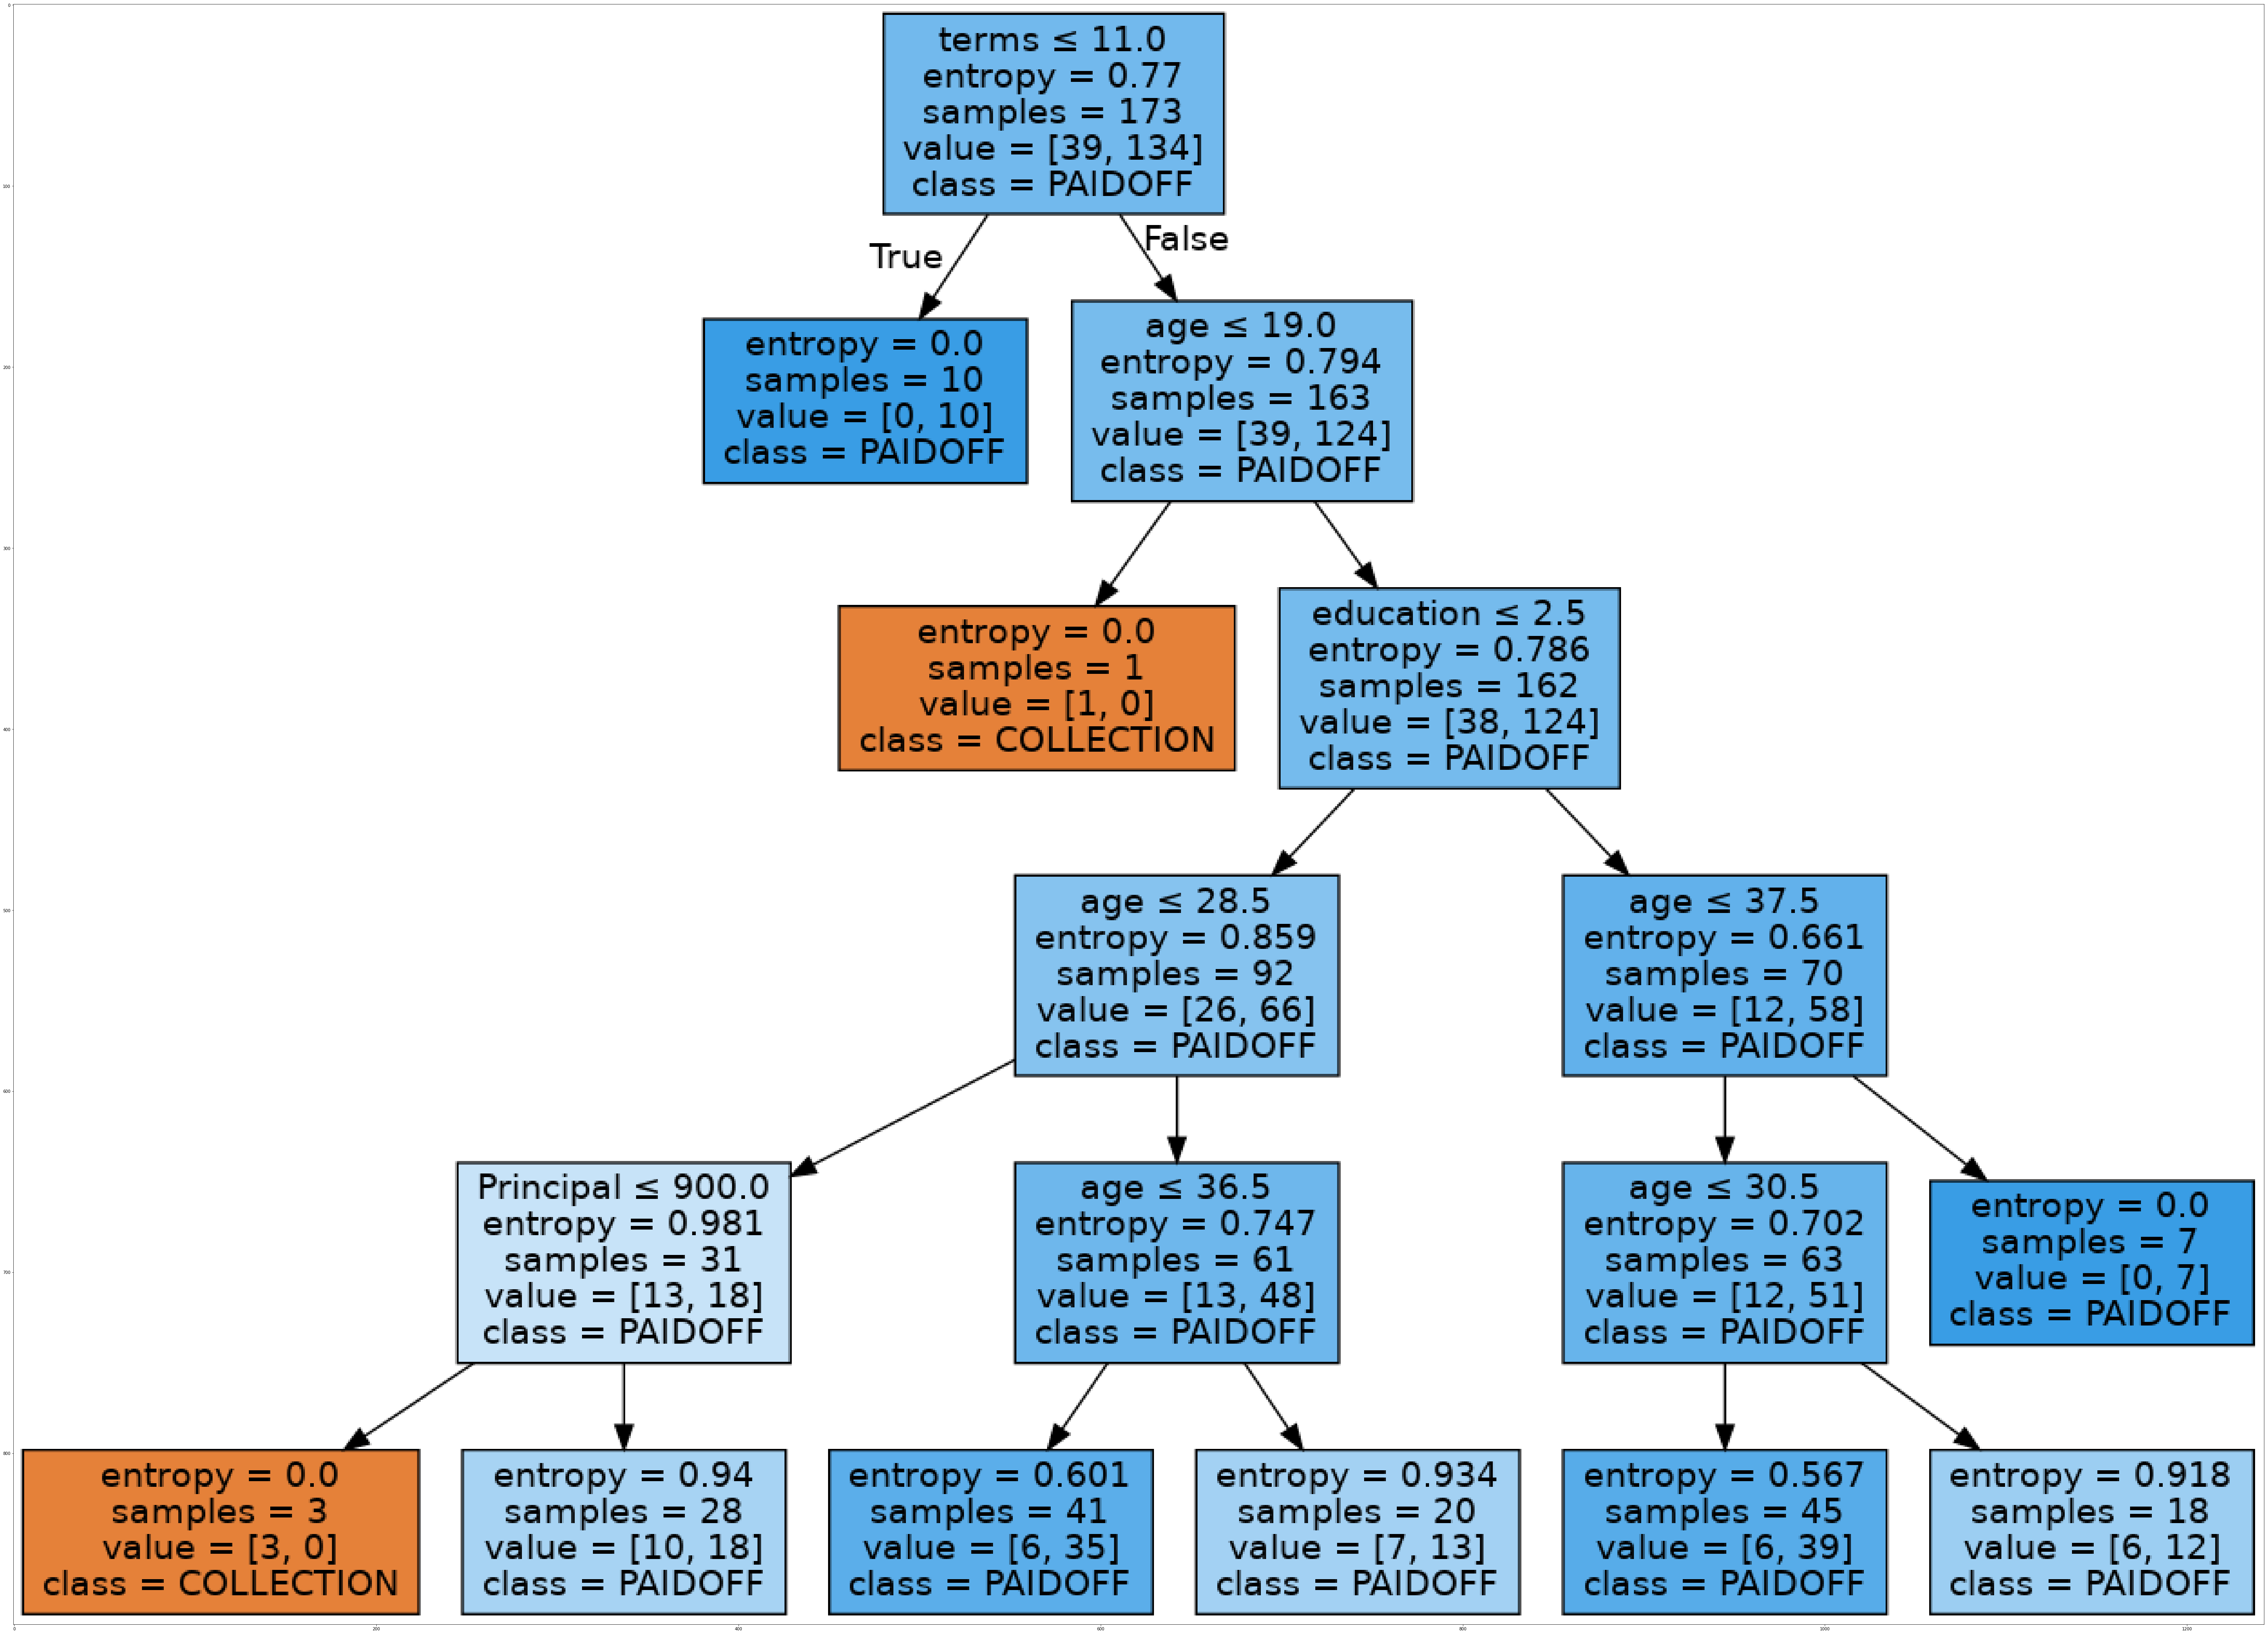

In [765]:
#LET'S PLOT IT USING THIS CONFIG
#-- A name for the image to plot de result
filename = "LOANTREE.png"
#-- Features
features = ['Principal','terms', 'age', 'education', 'Gender']
#--Export graphics
dot_data = StringIO()
tree.export_graphviz(treeOfLoans,feature_names=features, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
#--Create an image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
#-- Read the created image
image = mpimg.imread(filename)
#--Plot image
plt.figure(figsize=(100, 200))
plt.imshow(image,interpolation='nearest')

In [766]:
#--CONSTRUCTING THE PREDICTOR
#Predict the response for test dataset
treeLoanPredictor = treeOfLoans.predict(X_test)
#-- Comparing
#for ind in range(0,len(treeLoanPredictor),1):
#    print(treeLoanPredictor[ind]," VS", y_test.values[ind])

In [767]:
#--METRICS REPORT
print("Our model have an accuracy of: ", metrics.accuracy_score(y_test, treeLoanPredictor ))
print("JACCARD: %.3f" % jaccard_similarity_score(y_test, treeLoanPredictor))
print("F1_SCORE: %.3f" % f1_score(y_test, treeLoanPredictor,average ='weighted'))

Our model have an accuracy of:  0.7052023121387283
JACCARD: 0.705
F1_SCORE: 0.612


# Support Vector Machine

In [768]:
#--IMPORTING LIBRARIES
#-- Generalized libraries
import itertools
import numpy as np
import pandas as pd
import pylab as pl
#-- Plotting and image libraries
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg

#--Optimizador
import scipy.optimize as opt

#-- Sklearn libraries
#-- Algorithms
from sklearn import svm

#--Preprocessing and splitting methods
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO

#-- Evaluation metrics
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


In [769]:
#--GETTING DATA
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-24 23:18:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-11-24 23:18:17 (12.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [770]:
#--LOADING DATA FROM CSV
loans = pd.read_csv('loan_train.csv')
#loans = pd.read_csv('loan_test.csv')
loans.head(10) #Visualize the first nrows

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [771]:
#PRE-PROCESSING AND SELECTION VERIFY
loans.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e846259b0>]],
      dtype=object)

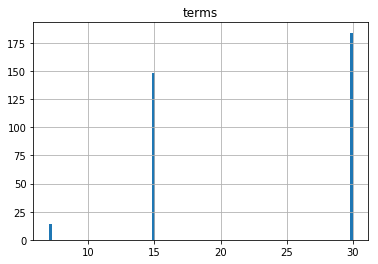

In [772]:
#--SHOW HISTOGRAM
loans.hist(column='terms', bins=100)

In [773]:
#--CONVERTING DATES COLUMNS TO DATE TIME OBJECTS
for x in ['effective_date','due_date']:
    loans[x] = pd.to_datetime(loans[x])

In [774]:
#--SETTING THE DEPENDENTS AND INDEPENDENT VARIABLES
X = np.asarray(loans[['Principal','terms', 'age', 'education', 'Gender']])
y = loans['loan_status']
print(np.unique(y))

['COLLECTION' 'PAIDOFF']


In [775]:
#--COLUMNS TO NUMERICAL VALUES CONVERTIONS
#--Education field convertion
codif_edu = preprocessing.LabelEncoder()
codif_edu.fit(X[:,3])
#codif_edu.classes_
X[:,3] = codif_edu.transform(X[:,3])

#--Gender field convertion
codif_gen = preprocessing.LabelEncoder()
codif_gen.fit(X[:,4])
#codif_gen.classes_
X[:,4] = codif_gen.transform(X[:,4])

#--Loan_Status convertion
codif_loanStatus = preprocessing.LabelEncoder()
codif_loanStatus.fit(y)
codif_loanStatus.classes_
y = codif_loanStatus.transform(y)
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [776]:
X[0:15]

array([[1000, 30, 45, 1, 1],
       [1000, 30, 33, 0, 0],
       [1000, 15, 27, 3, 1],
       [1000, 30, 28, 3, 0],
       [1000, 30, 29, 3, 1],
       [1000, 30, 36, 3, 1],
       [1000, 30, 28, 3, 1],
       [800, 15, 26, 3, 1],
       [300, 7, 29, 3, 1],
       [1000, 15, 39, 1, 1],
       [1000, 30, 26, 3, 1],
       [900, 7, 26, 3, 0],
       [1000, 7, 27, 1, 1],
       [800, 15, 26, 3, 1],
       [1000, 30, 40, 1, 1]], dtype=object)

In [777]:
y[0:5]

array([1, 1, 1, 1, 1])

In [778]:
#TIME TO MAKE THE TRAIN AND TEST SPLIT
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=3)
print ('TRAIN SET SHAPE:', X_train.shape,  y_train.shape)
print ('TEST SET SHAPE:', X_test.shape,  y_test.shape)

TRAIN SET SHAPE: (242, 5) (242,)
TEST SET SHAPE: (104, 5) (104,)


In [779]:
#--SVM IMPLEMENTATION
"""
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, 
mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
"""
svmLoan = svm.SVC(kernel='linear',gamma='scale')
svmLoan.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [780]:
#YHAT PREDICTOR
yhat = svmLoan.predict(X_test)
yhat[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [781]:
#-- A CONFUSSION MATRIX PLOTTER TOOL
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='CONFUSION MATRIX',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.74      1.00      0.85        77

   micro avg       0.74      0.74      0.74       104
   macro avg       0.37      0.50      0.43       104
weighted avg       0.55      0.74      0.63       104

Confusion matrix, without normalization
[[ 0 27]
 [ 0 77]]


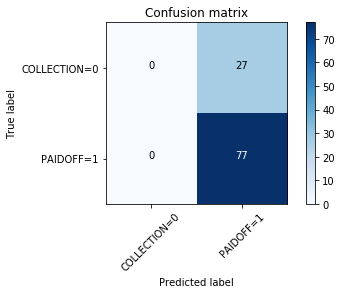

In [782]:
#Using the tool for plot.We pass y_test and y_hat as parameters
confusionMatrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
#np.unique(y)
#['COLLECTION', 'PAIDOFF']
plot_confusion_matrix(confusionMatrix, classes=['COLLECTION=0','PAIDOFF=1'],normalize= False,  title='Confusion matrix')

In [784]:
#--METRICS REPORT
print("Our model have an accuracy of: ", metrics.accuracy_score(y_test, yhat ))
print("JACCARD: %.3f" % jaccard_similarity_score(y_test, yhat))
print("F1_SCORE: %.3f" % f1_score(y_test, yhat,average ='weighted'))

Our model have an accuracy of:  0.7403846153846154
JACCARD: 0.740
F1_SCORE: 0.630


# Logistic Regression

In [785]:
#--IMPORTING LIBRARIES
#-- Generalized libraries
import itertools
import numpy as np
import pandas as pd
import pylab as pl
#-- Plotting and image libraries
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg

#--Optimizador
import scipy.optimize as opt

#-- Sklearn libraries
#-- Algorithms
from sklearn.linear_model import LogisticRegression

#--Preprocessing and splitting methods
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO

#-- Evaluation metrics
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [786]:
#--GETTING DATA
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-24 23:19:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2019-11-24 23:19:37 (15.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [787]:
#-- A CONFUSSION MATRIX PLOTTER TOOL
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [790]:
#--LOADING DATA FROM CSV
loans = pd.read_csv('loan_train.csv')
#loans = pd.read_csv('loan_test.csv')
loans.head(10) #Visualize the first nrows

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [791]:
#PRE-PROCESSING AND SELECTION VERIFY
loans.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e88680208>]],
      dtype=object)

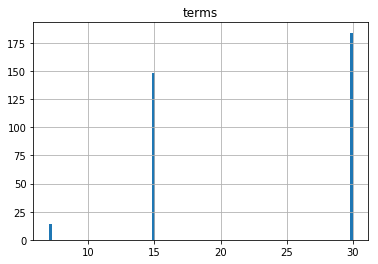

In [792]:
#SHOW HISTOGRAM
loans.hist(column='terms', bins=100)

In [793]:
#--CONVERTING DATES COLUMNS TO DATE TIME OBJECTS
for x in ['effective_date','due_date']:
    loans[x] = pd.to_datetime(loans[x])

In [794]:
#--SETTING THE DEPENDENTS AND INDEPENDENT VARIABLES
X = np.asarray(loans[['Principal','terms', 'age', 'education', 'Gender']])
y = np.asarray(loans['loan_status'])
print(np.unique(y))

['COLLECTION' 'PAIDOFF']


In [795]:
#--COLUMNS TO NUMERICAL VALUES CONVERTIONS

#--Education field convertion
codif_edu = preprocessing.LabelEncoder()
codif_edu.fit(X[:,3])
#codif_edu.classes_
X[:,3] = codif_edu.transform(X[:,3])

#--Gender field convertion
codif_gen = preprocessing.LabelEncoder()
codif_gen.fit(X[:,4])
#codif_gen.classes_
X[:,4] = codif_gen.transform(X[:,4])

#--Loan_Status convertion
codif_loanStatus = preprocessing.LabelEncoder()
codif_loanStatus.fit(y)
#codif_loanStatus.classes_
y = codif_loanStatus.transform(y)

In [796]:
#NORMALIZE DATA BEFORE TRAINING AND TESTING
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.52,  0.92,  2.33, -0.65,  0.42],
       [ 0.52,  0.92,  0.34, -1.52, -2.38],
       [ 0.52, -0.96, -0.65,  1.1 ,  0.42],
       [ 0.52,  0.92, -0.49,  1.1 , -2.38],
       [ 0.52,  0.92, -0.32,  1.1 ,  0.42],
       [ 0.52,  0.92,  0.84,  1.1 ,  0.42],
       [ 0.52,  0.92, -0.49,  1.1 ,  0.42],
       [-1.31, -0.96, -0.82,  1.1 ,  0.42],
       [-5.89, -1.96, -0.32,  1.1 ,  0.42],
       [ 0.52, -0.96,  1.34, -0.65,  0.42]])

In [797]:
#TIME TO MAKE THE TRAIN AND TEST SPLIT
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)
print ('TRAIN SET SHAPE:', X_train.shape,  y_train.shape)
print ('TEST SET SHAPE:', X_test.shape,  y_test.shape)

TRAIN SET SHAPE: (207, 5) (207,)
TEST SET SHAPE: (139, 5) (139,)


In [798]:
#LOGISTIC REGRESSION OBJECT
"""
Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic
regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, 
‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these 
optimizers if you search it in internet."""

loanLogisticReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [799]:
#YHAT PREDICTOR
yhat = loanLogisticReg.predict(X_test)

In [800]:
"""
predict_proba returns estimates for all classes, ordered by the label of classes. 
So, the first column is the probability of class 1, P(Y=1|X), and second column is 
probability of class 0, P(Y=0|X):"""
yhat_proba = loanLogisticReg.predict_proba(X_test)

Confusion matrix, without normalization
[[  0  37]
 [  0 102]]


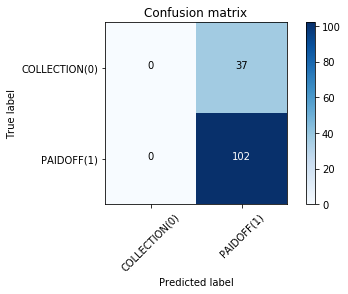

In [803]:
#Using the tool for plot.We pass y_test and y_hat as parameters
confusionMatrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
#np.unique(y)
#['COLLECTION', 'PAIDOFF']
plot_confusion_matrix(confusionMatrix, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

In [804]:
#--METRICS REPORT
print("JACCARD: %.3f" % jaccard_similarity_score(y_test, yhat))
print("F1_SCORE: %.3f" % f1_score(y_test, yhat,average ='weighted'))
print("LOG LOSS: %.3f" % log_loss(y_test, yhat_proba))

print(classification_report(y_test, yhat))


JACCARD: 0.734
F1_SCORE: 0.621
LOG LOSS: 0.623
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.73      1.00      0.85       102

   micro avg       0.73      0.73      0.73       139
   macro avg       0.37      0.50      0.42       139
weighted avg       0.54      0.73      0.62       139



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Evaluation using Test set

In [806]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

import itertools
import numpy as np
import pandas as pd

#-- Sklearn libraries
#-- Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import scipy.optimize as opt
from sklearn import svm
from sklearn.linear_model import LogisticRegression

#--Preprocessing and splitting methods
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

First, download and load the test set:

In [807]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-25 00:10:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-11-25 00:10:51 (386 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [811]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
X = np.asarray(loans[['Principal','terms', 'age', 'education', 'Gender']])
y = np.asarray(loans['loan_status'])

#--Education field convertion
codif_edu = preprocessing.LabelEncoder()
codif_edu.fit(X[:,3])
#codif_edu.classes_
X[:,3] = codif_edu.transform(X[:,3])

#--Gender field convertion
codif_gen = preprocessing.LabelEncoder()
codif_gen.fit(X[:,4])
#codif_gen.classes_
X[:,4] = codif_gen.transform(X[:,4])

#NORMALIZE DATA BEFORE TRAINING AND TESTING
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [820]:
#KNN
K_max = 35
"""
numpy.zeros(shape, dtype=float, order='C')
Return a new array of given shape and type, filled with zeros.
"""
meanAccuracy = np.zeros((K_max-1))
standardDeviation = np.zeros((K_max-1))
yHats = [[] for k in range(0,K_max-1,1)]

for k in range(1,K_max,1):
    neighbor = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neighbor.predict(X_test)
    meanAccuracy[k-1] = metrics.accuracy_score(y_test, yhat)
    standardDeviation[k-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    yHats[k-1] = yhat
accIndex = meanAccuracy.argmax()+1

#DECISION TREE
treeOfLoans = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=2,min_samples_leaf=1)
treeOfLoans.fit(X_train,y_train)
treeLoanPredictor = treeOfLoans.predict(X_test)

#SVM
svmLoan = svm.SVC(kernel='linear',gamma='scale')
svmLoan.fit(X_train, y_train) 
yhat = svmLoan.predict(X_test)

#LOGISTIC REGRESSION
loanLogisticReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatrg = loanLogisticReg.predict(X_test)
yhat_proba = loanLogisticReg.predict_proba(X_test)

JAC_METRICS = [jaccard_similarity_score(y_test, yHats[accIndex]), 
               jaccard_similarity_score(y_test, treeLoanPredictor),
               jaccard_similarity_score(y_test, yhat),
               jaccard_similarity_score(y_test, yhatrg)]

[0.7553956834532374, 0.6258992805755396, 1, 1]


In [818]:
F1_METRICS = [f1_score(y_test, yHats[accIndex],average ='weighted'),
              f1_score(y_test, treeLoanPredictor,average ='weighted'),
              f1_score(y_test, yhat,average ='weighted'),
              f1_score(y_test, yhat,average ='weighted')]

In [842]:
LL_METRICS = [None,None,None,log_loss(y_test, yhat_proba)]

In [843]:
TABLE = pd.DataFrame({'Jaccard ':JAC_METRICS, 'F1-score':F1_METRICS, 'LogLoss':LL_METRICS}, index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
TABLE.round(3)

,Jaccard,F1-score,LogLoss
KNN,0.755,0.688,NaN
Decision Tree,0.626,0.600,NaN
SVM,0.734,0.621,NaN
LogisticRegression,0.734,0.621,0.623


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>